In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.cm as cm 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

dataset "Wine Dataset" https://www.kaggle.com/harrywang/wine-dataset-for-clustering

The feature sets are:
* Alcohol
* Malic acid
* Ash
* Alcalinity of ash
* Magnesium
* Total phenols
* Flavanoids
* Nonflavanoid phenols
* Proanthocyanins
* Color intensity
* Hue
* OD280/OD315 of diluted wines
* Proline

In [84]:
wine_df = pd.read_csv("wine.csv")
wine_df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [85]:
wine_df.isnull().any()

Alcohol                 False
Malic_Acid              False
Ash                     False
Ash_Alcanity            False
Magnesium               False
Total_Phenols           False
Flavanoids              False
Nonflavanoid_Phenols    False
Proanthocyanins         False
Color_Intensity         False
Hue                     False
OD280                   False
Proline                 False
dtype: bool

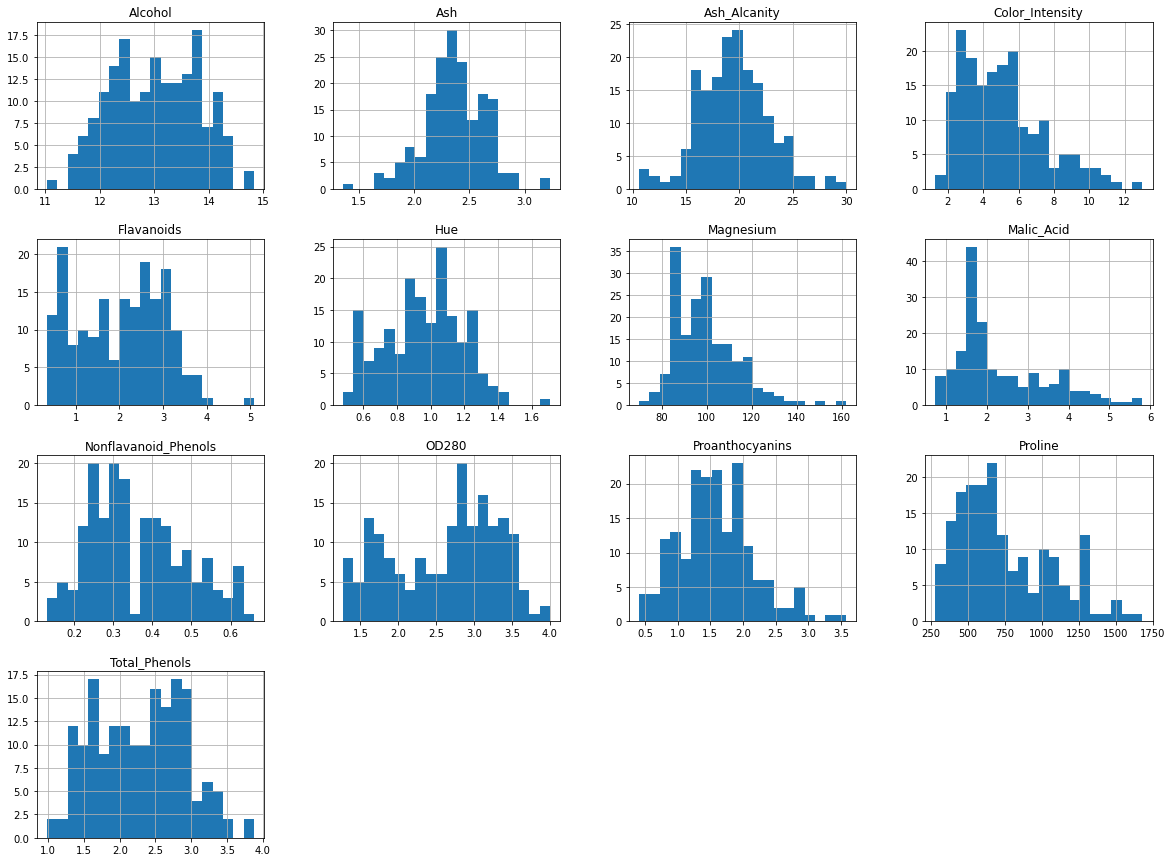

In [86]:
wine_df.hist(bins=20, figsize = (20,15))
plt.show()

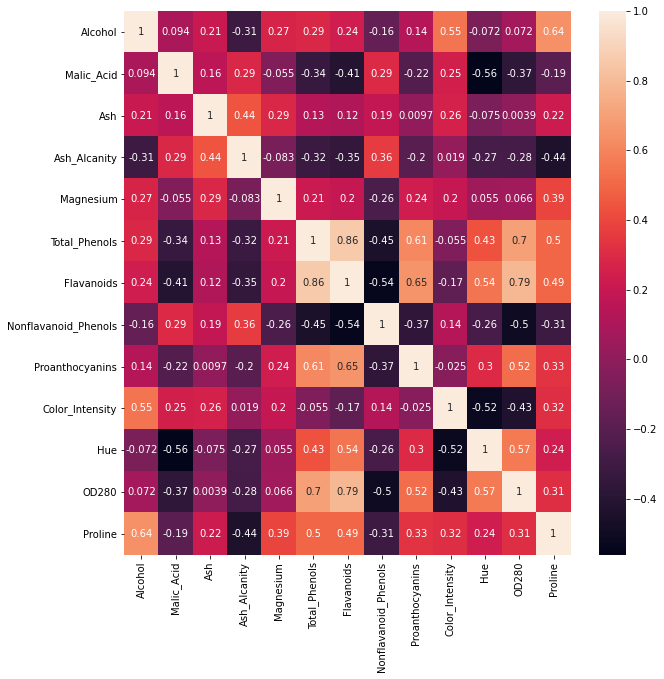

In [87]:
corrMatrix = wine_df.corr()
plt.figure(figsize = (10,10))
sn.heatmap(corrMatrix, annot=True)
plt.show()

## PCA

In [88]:
pca = PCA(n_components=2) 
pca_data = pca.fit_transform(wine_df)

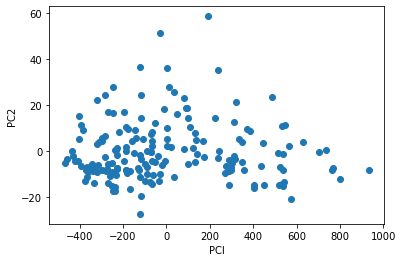

In [89]:
plt.scatter(pca_data[:,0], pca_data[:,1])
plt.xlabel('PCl')
plt.ylabel('РС2')
plt.show()

## Elbow Method 
(Choosing number of clusters)

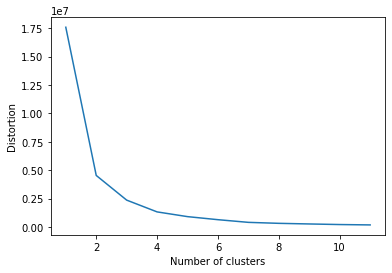

In [90]:
distortion=[]
for i in range(1,12):
    km = KMeans(i, random_state=0)
    km.fit(pca_data)
    distortion.append(km.inertia_)

number_clusters = range(1,12)
plt.plot(number_clusters,distortion)
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

Best number of clusters is 3

## KMeans

In [166]:
def plot_clusters(y_km):    
    centroids = km.cluster_centers_
    u_labels = np.unique(y_km)
    colors = cm.spring(np.linspace(0, 1, u_labels.shape[0]))
    
    for i, color in zip(u_labels, colors):
        filtered_label_i = pca_data[y_km == i] 
        plt.scatter(filtered_label_i[:,0], filtered_label_i[:,1], label = i, color=color)

    plt.scatter(centroids[:,0], centroids[:,1] , s = 80, color = 'k')
    plt.legend()
    plt.show()

1    69
2    62
0    47
dtype: int64


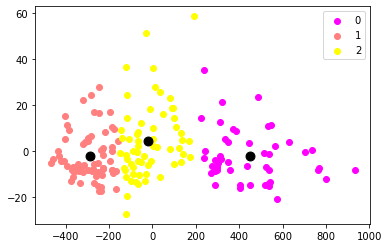

In [167]:
km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=2)
y_km = pd.Series(km.fit_predict(pca_data))
print(y_km.value_counts())
plot_clusters(y_km)

Results for different number of clusters

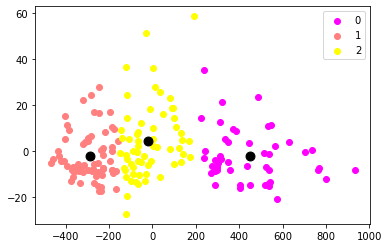

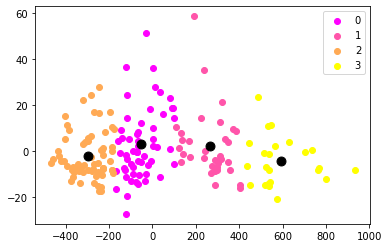

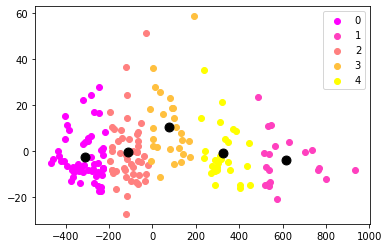

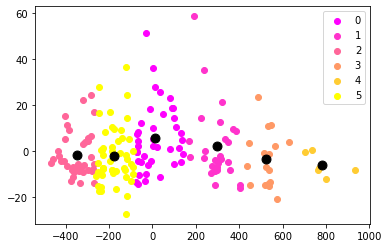

In [168]:
for k in range(3, 7):
    km = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=2)
    y_km = pd.Series(km.fit_predict(pca_data))
#     print(y_km.value_counts())
    plot_clusters(y_km)